<a href="https://colab.research.google.com/github/klarcika/TZ/blob/main/Naloga4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
df_rank= pd.read_csv("university_rank_2020.csv",index_col="University", decimal=",")
df_other = pd.read_csv("university_rank_other.csv", sep=" ",index_col=0, decimal=".")
df_student= pd.read_excel("university_rank_students.xlsx",index_col="University", sheet_name=0)
df = pd.concat([df_other, df_rank, df_student], axis=1)

In [6]:
from sklearn.impute import SimpleImputer
import numpy as np
povprecje= SimpleImputer(missing_values=np.nan, strategy="mean")
stevilski = ["International_Students(%)", "Percentage_Female(%)", "Percentage_Male(%)"]
df[stevilski] = povprecje.fit_transform(df[stevilski])

In [7]:
kategoricni=["International_Outlook"]
najpogostejsi= SimpleImputer(missing_values=np.nan, strategy="most_frequent") #ce dopolnjujemo z stevilskimi, damo most_frequent
df[kategoricni]= najpogostejsi.fit_transform(df[kategoricni])

In [8]:
# 1. Ustvarite nov stolpec Status. Vse univerzitete, ki imajo Rank:
# manjši od 200, naj imajo status prestigious (prestižne),
# večji od 200 in manjši od 300, naj imajo status reputable (ugledne),
# večji od 300 in manjši od 430, naj imajo status average (povprečne),
# večji od 430, naj imajo status badReputation (slab sloves).
# Pazite da zajamete tudi mejne vrednosti. Na koncu preverite, da ne obstajajo nobene manjkajoče vrednosti. Izpišite prvih 5 vrstic.

df['Status'] = pd.cut(df['Rank'],
                      bins=[0, 200, 300, 430, df['Rank'].max()],
                      labels=['prestigious', 'reputable', 'average', 'badReputation'],
                      include_lowest=True)

# Preverite, če obstajajo manjkajoče vrednosti
if df['Status'].isnull().any():
    print("manjkajoce vrednosti.")
else:
    print("Ni manjkajočih vrednosti")

# Izpišite prvih 5 vrstic
print(df.head())


Ni manjkajočih vrednosti
                                       Teaching  Research  Citations  \
University of Oxford                       90.5      99.6       98.4   
California Institute of Technology         92.1      97.2       97.9   
University of Cambridge                    91.4      98.7       95.8   
Stanford University                        92.8      96.4       99.9   
Massachusetts Institute of Technology      90.5      92.4       99.5   

                                       Industry_Income International_Outlook  \
University of Oxford                              65.5             excellent   
California Institute of Technology                88.0             excellent   
University of Cambridge                           59.3             excellent   
Stanford University                               66.2             excellent   
Massachusetts Institute of Technology             86.9             excellent   

                                              Country     Num

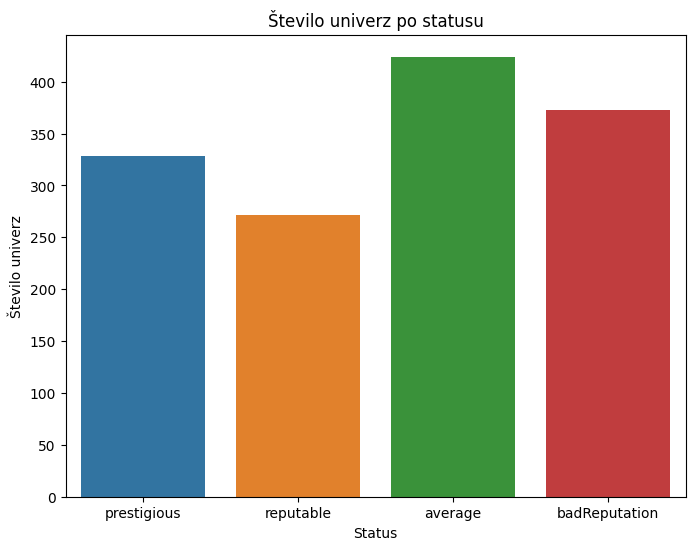

In [9]:
# 2. Izrišite graf, ki bo prikazoval, koliko je univerz s posameznim statusom.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Status', order=['prestigious', 'reputable', 'average', 'badReputation'])
plt.xlabel('Status')
plt.ylabel('Število univerz')
plt.title('Število univerz po statusu')
plt.show()

In [23]:
# 3. Preverite kakšen status sta dobili slovenski univerzi.
slo_uni = df[df['Country'] == 'Slovenia']
status_slo = slo_uni['Status'].unique()

print("Status slovenskih univerz:", status_slo)

Status slovenskih univerz: ['average']
Categories (4, object): ['prestigious' < 'reputable' < 'average' < 'badReputation']


In [11]:
df.dtypes

Teaching                      float64
Research                      float64
Citations                     float64
Industry_Income               float64
International_Outlook          object
Country                        object
Number_students                object
Numb_students_per_Staff        object
Score_Result                   object
Rank                            int64
International_Students(%)     float64
Percentage_Female(%)          float64
Percentage_Male(%)            float64
Status                       category
dtype: object

In [12]:
# 4. Izdelajte klasifikacijo, ki bo napovedovala Status univerze. Postopek klasifikacije ponovite dvakrat.

# 1. Pri prvi izvedbi:

# Ustvarite kopijo df in jo poimenujte df1.
# Kategorične (nominalne) podatke iz df1 pretvorite v številske s pomočjo LabelEncoder. Pazite da ne pretvorite tudi podatkov izhodnega razreda.
# Številske podatke standardizirajte.
# Uporabite klasifikacijski algoritem nad prilagojenimi podatki iz df1.
# Izpišite točnost klasifikacije.
df1 = df.copy(deep=True)
from sklearn.preprocessing import LabelEncoder
kategoricni = ["Country", "Number_students", "Numb_students_per_Staff", "International_Outlook"]
for k in kategoricni:
    df1[k] = LabelEncoder().fit_transform(df1[k])

In [14]:
stevilski=df.select_dtypes(exclude=["object", "category"]).columns
stevilski = [col for col in stevilski if col not in ["Rank", "Score_Result"]]

from sklearn.preprocessing import StandardScaler
df1[stevilski]= StandardScaler().fit_transform(df1[stevilski])
df1.head()

,Teaching,Research,Citations,Industry_Income,International_Outlook,Country,Number_students,Numb_students_per_Staff,Score_Result,Rank,International_Students(%),Percentage_Female(%),Percentage_Male(%),Status
University of Oxford,4.402488,4.313494,1.813729,1.169357,1,88,513,18,95.4,1,2.625712,-0.100112,0.390898,prestigious
California Institute of Technology,4.515607,4.176592,1.795695,2.552468,1,89,470,329,94.5,2,1.660154,0.000000,1.145591,prestigious
University of Cambridge,4.466117,4.262156,1.719953,0.788233,1,88,427,14,94.4,3,2.274600,-0.036874,0.328007,prestigious
Stanford University,4.565096,4.130958,1.867831,1.212387,1,89,316,341,94.3,4,0.000000,-0.289827,0.579572,prestigious
Massachusetts Institute of Technology,4.402488,3.902788,1.853403,2.484849,1,89,86,355,93.6,5,2.011266,-0.542781,0.831136,prestigious


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

izhod = "Status"
df_izhod = df1[izhod]
df_vhod = df1.drop([izhod, "Rank", "Score_Result"], axis=1)

kfold = StratifiedKFold(n_splits=5)
rezultat = cross_val_score(RandomForestClassifier(n_estimators=50), df_vhod, df_izhod, cv=kfold, scoring="accuracy")
print(rezultat.mean())

0.8289528929851511


In [16]:
# Pri drugi izvedbi:

# Ustvarite kopijo df in jo poimenujte df2.
# Kategorične (nominalne) podatke iz df2 pretvorite v indikacijske parametre (dummy variable). Pazite da ne pretvorite tudi podatkov izhodnega razreda.
# Številske podatke standardizirajte.
# Uporabite klasifikacijski algoritem nad prilagojenimi podatki iz df2.
# Izpišite točnost klasifikacije.
df2= pd.get_dummies(df, columns=kategoricni)
df2.shape

(1396, 1853)

In [17]:
df2.dtypes

Teaching                           float64
Research                           float64
Citations                          float64
Industry_Income                    float64
Score_Result                        object
                                    ...   
Numb_students_per_Staff_9.8          uint8
Numb_students_per_Staff_9.9          uint8
International_Outlook_bad            uint8
International_Outlook_excellent      uint8
International_Outlook_good           uint8
Length: 1853, dtype: object

In [18]:
st=df.select_dtypes(include=["uint8","int64", "float64","boolean"]).columns
# st = df.drop('Status', axis=1)
from sklearn.preprocessing import StandardScaler
df2[st]= StandardScaler().fit_transform(df2[st])
df2.head()

,Teaching,Research,Citations,Industry_Income,Score_Result,Rank,International_Students(%),Percentage_Female(%),Percentage_Male(%),Status,...,Numb_students_per_Staff_9.3,Numb_students_per_Staff_9.4,Numb_students_per_Staff_9.5,Numb_students_per_Staff_9.6,Numb_students_per_Staff_9.7,Numb_students_per_Staff_9.8,Numb_students_per_Staff_9.9,International_Outlook_bad,International_Outlook_excellent,International_Outlook_good
University of Oxford,4.402488,4.313494,1.813729,1.169357,95.4,-2.230759,2.625712,-0.100112,0.390898,prestigious,...,0,0,0,0,0,0,0,0,1,0
California Institute of Technology,4.515607,4.176592,1.795695,2.552468,94.5,-2.223662,1.660154,0.000000,1.145591,prestigious,...,0,0,0,0,0,0,0,0,1,0
University of Cambridge,4.466117,4.262156,1.719953,0.788233,94.4,-2.216564,2.274600,-0.036874,0.328007,prestigious,...,0,0,0,0,0,0,0,0,1,0
Stanford University,4.565096,4.130958,1.867831,1.212387,94.3,-2.209467,0.000000,-0.289827,0.579572,prestigious,...,0,0,0,0,0,0,0,0,1,0
Massachusetts Institute of Technology,4.402488,3.902788,1.853403,2.484849,93.6,-2.202369,2.011266,-0.542781,0.831136,prestigious,...,0,0,0,0,0,0,0,0,1,0


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder


# Nadaljujte s preostalim kodom za izvajanje klasifikacije

izhod = "Status"
df_izhod = df2[izhod]
df_vhod = df1.drop([izhod, "Rank", "Score_Result"], axis=1)


k_fold = StratifiedKFold(n_splits=5)
model_rf = RandomForestClassifier(n_estimators=50, random_state=789)
rezultat_rf = cross_val_score(model_rf, df_vhod, df_izhod, cv=k_fold, scoring="accuracy")
print(rezultat_rf.mean())


0.8232283666154634


In [20]:
# 5. Poiščite najboljše nastavitve parametrov za algoritem naključnega gozda s pomočjo naključnega iskanja. Pri tem upoštevajte naslednje:

# Uporabljena mora biti navzkrižna validacija s petimi rezi.
# Za ocenjevanje naj bo uporabljena metrika točnosti.
# Uporabljeni naj bodo enaki vhodni in izhodni podatki kot pri 4. točki.
# Za podatke uporabite tisti df, ki namesto kategoričnih vrednosti vsebuje indikacijske parametre.
# Iskanje omejite na 50 iteracij.
# Pri tem iskanju preizkusite naslednje vrednosti parametrov:
# n_estimators = naključne diskretne vrednosti iz uniformne porazdelitve med 2 in 1500,
# max_depth = naključne diskretne vrednosti iz uniformne porazdelitve med 2 in 50,
# criterion = gini, entropy,
# max_features = auto, sqrt, log2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Definirajte razpon vrednosti za hiperparametre
param_dist = {
    'n_estimators': list(range(2, 1501)),
    'max_depth': list(range(2, 51)),
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Ustvarite model RandomForestClassifier
model_rf = RandomForestClassifier()

# Ustvarite iskalnik s 50 iteracijami
random_search = RandomizedSearchCV(model_rf, param_distributions=param_dist, n_iter=50, scoring='accuracy', cv=5, n_jobs=-1)

# Izvajanje iskanja na podatkih
random_search.fit(df_vhod, df_izhod)

print("Najboljse vrednosti parametrov", random_search.best_params_)
print("Najboljši rezultat", random_search.best_score_)
print("Najboljšo kombinacijo parametrov", random_search.best_estimator_)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Najboljse vrednosti parametrov {'n_estimators': 195, 'max_features': 'auto', 'max_depth': 20, 'criterion': 'entropy'}
Najboljši rezultat 0.8382667690732207
Najboljšo kombinacijo parametrov RandomForestClassifier(criterion='entropy', max_depth=20, max_features='auto',
                       n_estimators=195)
